In [1]:
import numpy as np 
import pandas as pd
from colorama import init, Fore
from colorama import Back
from colorama import Style

pass_data = pd.read_csv('titanic3.csv',sep=';', thousands = ".", decimal = ',')
pass_data[(pass_data.sex == 'female')].shape




(466, 14)

In [42]:
pass_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
pass_data[(pass_data.sex == 'male')].shape


(843, 14)

In [3]:
#pass_data[(pass_data.survived == 1)].shape
#not needed, how many people survived 

In [4]:
pass_data['survived'].mean()
# procents of survivet people 

0.3819709702062643

In [5]:
pass_data[(pass_data.pclass == 1)].shape
# procents of pople in 1-st class

(323, 14)

In [6]:
pass_data.groupby('pclass')['age'].mean()
#age in classes

pclass
1.0    39.159918
2.0    29.506705
3.0    24.816367
Name: age, dtype: float64

In [7]:
pass_data['age'].mean()
#middle age on board

29.8811345124283

In [8]:
pass_data['age'].median()
#median age

28.0

In [9]:
print(Fore.GREEN + 'Коэффициент корреляции Пирсона: %.3f' %pass_data['sibsp'].corr(pass_data['parch'], method = 'pearson'))

Коэффициент корреляции Пирсона: 0.374


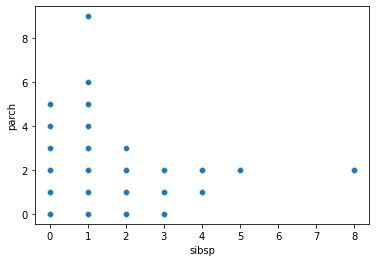

In [10]:
import seaborn as sns
sns.scatterplot(data=pass_data, x='sibsp', y='parch');

In [43]:
def parse_first_name_female(name):
    first = name.str.extract(r"Mrs\.\s+[^(]*\((\w+)", expand=False)
    first.loc[first.isna()] = name.str.extract(r"\.\s+(\w+)", expand=False)
    return first

#------------------------------------------------------------------------------------------------------------------
# .isna() - Обнаружение отсутствующих значений.
# .loc[] - Доступ к группе строк и столбцов с помощью меток или логического массива.(uses py Pandas) 
# .extract() - 
# expand=false - return index of element in massive.
#------------------------------------------------------------------------------------------------------------------
# были использованы регулярные выражения 
# regular expressions gives pattern to find some strig in a text(создают шаблон поиска заданного набора символов в текста)
# r - read just this line, not to use functoins in this line (дает установку читать строку, не используя в ней функции)
# .\s- space
# [^(] - отвечает за любой рандомный символ после пробела
#(\w+) - группировка символов любой цифры или буквы, одно и более вхождений
#------------------------------------------------------------------------------------------------------------------

female_names = parse_first_name_female(pass_data.loc[pass_data['sex']=="female", "name"])

female_names #самое популярное женское имя

0       Elisabeth
2           Helen
4          Bessie
6        Kornelia
8       Charlotte
          ...    
1286    Shawneene
1290        Ellen
1300       Selini
1304       Hileni
1305      Thamine
Name: name, Length: 466, dtype: object

Коэффициент корреляции Пирсона: -0.312


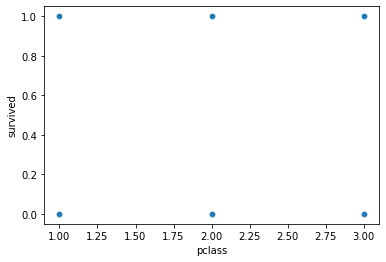

In [44]:
print(Fore.GREEN + 'Коэффициент корреляции Пирсона: %.3f' %pass_data['pclass'].corr(pass_data['survived'], method = 'pearson'))

sns.scatterplot(data=pass_data, x='pclass', y='survived');
#получается фигня какая-то. По факту наверное верно, что человек может быть жив или мертв, но получается в итоге фигня

<AxesSubplot:>

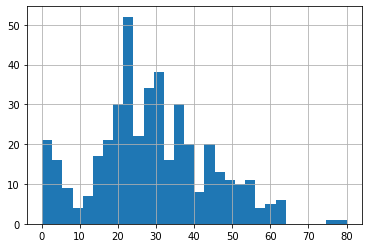

In [45]:
pass_data[(pass_data.survived == 1)].age.hist(bins = 30) #гистограмма возраста выживших пассажиров

<AxesSubplot:>

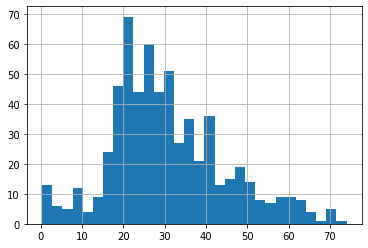

In [46]:
pass_data[(pass_data.survived == 0)].age.hist(bins = 30) #гистограмма возраста невыживших пассажиров

<AxesSubplot:>

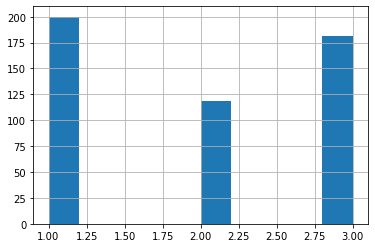

In [47]:
pass_data[(pass_data.survived == 1)].pclass.hist(bins = 10) #гистограмма возраста выживших пассажиров

<AxesSubplot:>

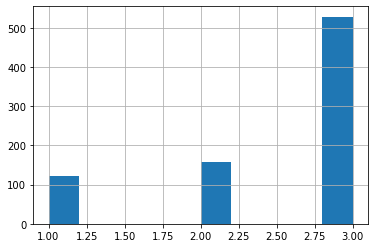

In [48]:
pass_data[(pass_data.survived == 0)].pclass.hist(bins = 10) #гистограмма возраста невыживших пассажиров

Гистограмма детей по полу: 


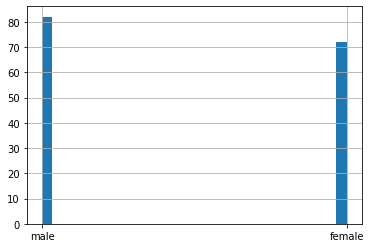

In [49]:
age1 = pass_data[(pass_data.age < 18)].sex.hist(bins = 30)

print(Fore.BLUE + 'Гистограмма детей по полу: ')

fig = age1.get_figure()

#гистограмма детей по полу 

Гистограмма взрослых по полу: 


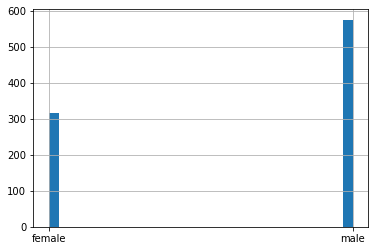

In [50]:
age2 = pass_data[(pass_data.age >= 18)].sex.hist(bins = 30)

print(Fore.YELLOW + 'Гистограмма взрослых по полу: ')

fig = age2.get_figure()

#гистограмма взрослых по полу 

In [51]:
print(Fore.RED + Style.BRIGHT + 'поставьте 5, пажалуста' + '🥺')

поставьте 5, пажалуста🥺
